In [1]:
# !unzip Sign_language_data.zip

In [ ]:
# first cloning the yolo v5 repository
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16383, done.
remote: Counting objects: 100% (277/277), done.
remote: Compressing objects: 100% (203/203), done.
remote: Total 16383 (delta 138), reused 159 (delta 74), pack-reused 16106
Receiving objects: 100% (16383/16383), 15.16 MiB | 12.76 MiB/s, done.
Resolving deltas: 100% (11175/11175), done.


In [13]:
# Go inside the yolov5 and first install yolo dependencies

%cd yolov5/
%pwd
%pip install -r requirements.txt

In [18]:
pwd

'/home/ranjit/Desktop/object_dete_yolo/sign-language-detection-YOLOV5/yolov5'

In [19]:
with open("../dataset/data.yaml", 'r') as stream:
    pass

In [37]:
# Now we are reading 
import yaml
with open("../dataset/data.yaml", 'r') as stream:
    yaml_data = yaml.safe_load(stream)
    num_classes = str(yaml_data['nc'])

print(f"No of class :- {num_classes}",'\n')
print(".Yaml file configuration ",'\n')
print(yaml_data)

No of class :- 6 

.Yaml file configuration  

{'train': '../dataset/train/images', 'val': '../dataset/test/images', 'nc': 6, 'names': ['Hello', 'IloveYou', 'No', 'Please', 'Thanks', 'Yes']}


In [22]:
pwd

'/home/ranjit/Desktop/object_dete_yolo/sign-language-detection-YOLOV5/yolov5'

In [36]:
# we want to configure this model configuration,
# just we will update no. of class --->  nc:

!cat models/yolov5s.yaml


# parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[

In [44]:
# This function will help to us , to overwrite nc: in yolov5s.yaml
# and we are only going to update
#           nc:    <----

from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [45]:
%%writetemplate models/yolov5s.yaml             # we have triggered our function here

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]


In [47]:
# so  let see, we have successfully updated the nc:6 instead of nc:80
!cat models/yolov5s.yaml


# parameters
nc: 6  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-

!python: This is a shell command that runs the Python interpreter. The exclamation mark (!) is used in Jupyter notebooks or IPython environments to execute shell commands.

train.py: This is the Python script responsible for training the YOLOv5 model. It is likely part of the YOLOv5 codebase.

--img 416: Specifies the size of the input images during training. In this case, the images are resized to 416x416 pixels.

--batch 16: Sets the batch size for training. The model is updated after processing each batch of 16 images.

--epochs 10: Defines the number of training epochs. One epoch is a complete pass through the entire training dataset.

--data '../dataset/data.yaml': Points to the YAML file (data.yaml) containing configuration information about the custom dataset. This includes paths to training and validation images, the number of classes, etc.

--cfg ./models/custom_yolov5s.yaml: Specifies the model configuration file (custom_yolov5s.yaml) that defines the architecture of the YOLOv5 model. It may include details about layer configurations, hyperparameters, etc.

--weights 'yolov5s.pt': Specifies the initial weights for the model. In this case, it starts with the pre-trained weights for the small YOLOv5 model (yolov5s.pt).

--name yolov5s_results: Sets a name for the training run. This will be used to create a directory to store training results, including checkpoints and logs.

--cache: Enables caching to speed up the training process. Cached data from previous epochs is reused to avoid redundant computations.

In [60]:
%cd /home/ranjit/Desktop/object_dete_yolo/sign-language-detection-YOLOV5/yolov5/
%pwd

/home/ranjit/Desktop/object_dete_yolo/sign-language-detection-YOLOV5/yolov5


/home/ranjit/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


'/home/ranjit/Desktop/object_dete_yolo/sign-language-detection-YOLOV5/yolov5'

### command to train your configured model, with your custome dataset
#### first go insidet the yolov5 file and execute the "train.py" file with some training parameters

In [ ]:
# if below commands is giving error in your jupyter notebook, then execute this below 
# command to train your yolov5 

# For linux :
# python3 train.py --img 416 --batch 16 --epochs 10 --data '../dataset/data.yaml' --cfg ./models/yolov5s.yaml --weights 'yolov5s.pt' --name training_logs --cache

# For Window :
# python train.py --img 416 --batch 16 --epochs 10 --data '../dataset/data.yaml' --cfg ./models/yolov5s.yaml --weights 'yolov5s.pt' --name training_logs --cache

In [ ]:
## first go insidet the yolov5 file and execute the "train.py" file with some training parameters
%%time
%cd '/home/ranjit/Desktop/object_dete_yolo/sign-language-detection-YOLOV5/yolov5'
!python train.py --img 416 --batch 16 --epochs 10 --data '../dataset/data.yaml' --cfg ./models/yolov5s.yaml --weights 'yolov5s.pt' --name training_result  --cache
# if it is now working ether use google colab or execute the above command in terminal

### Now we are ploting metrics chart of training of our model

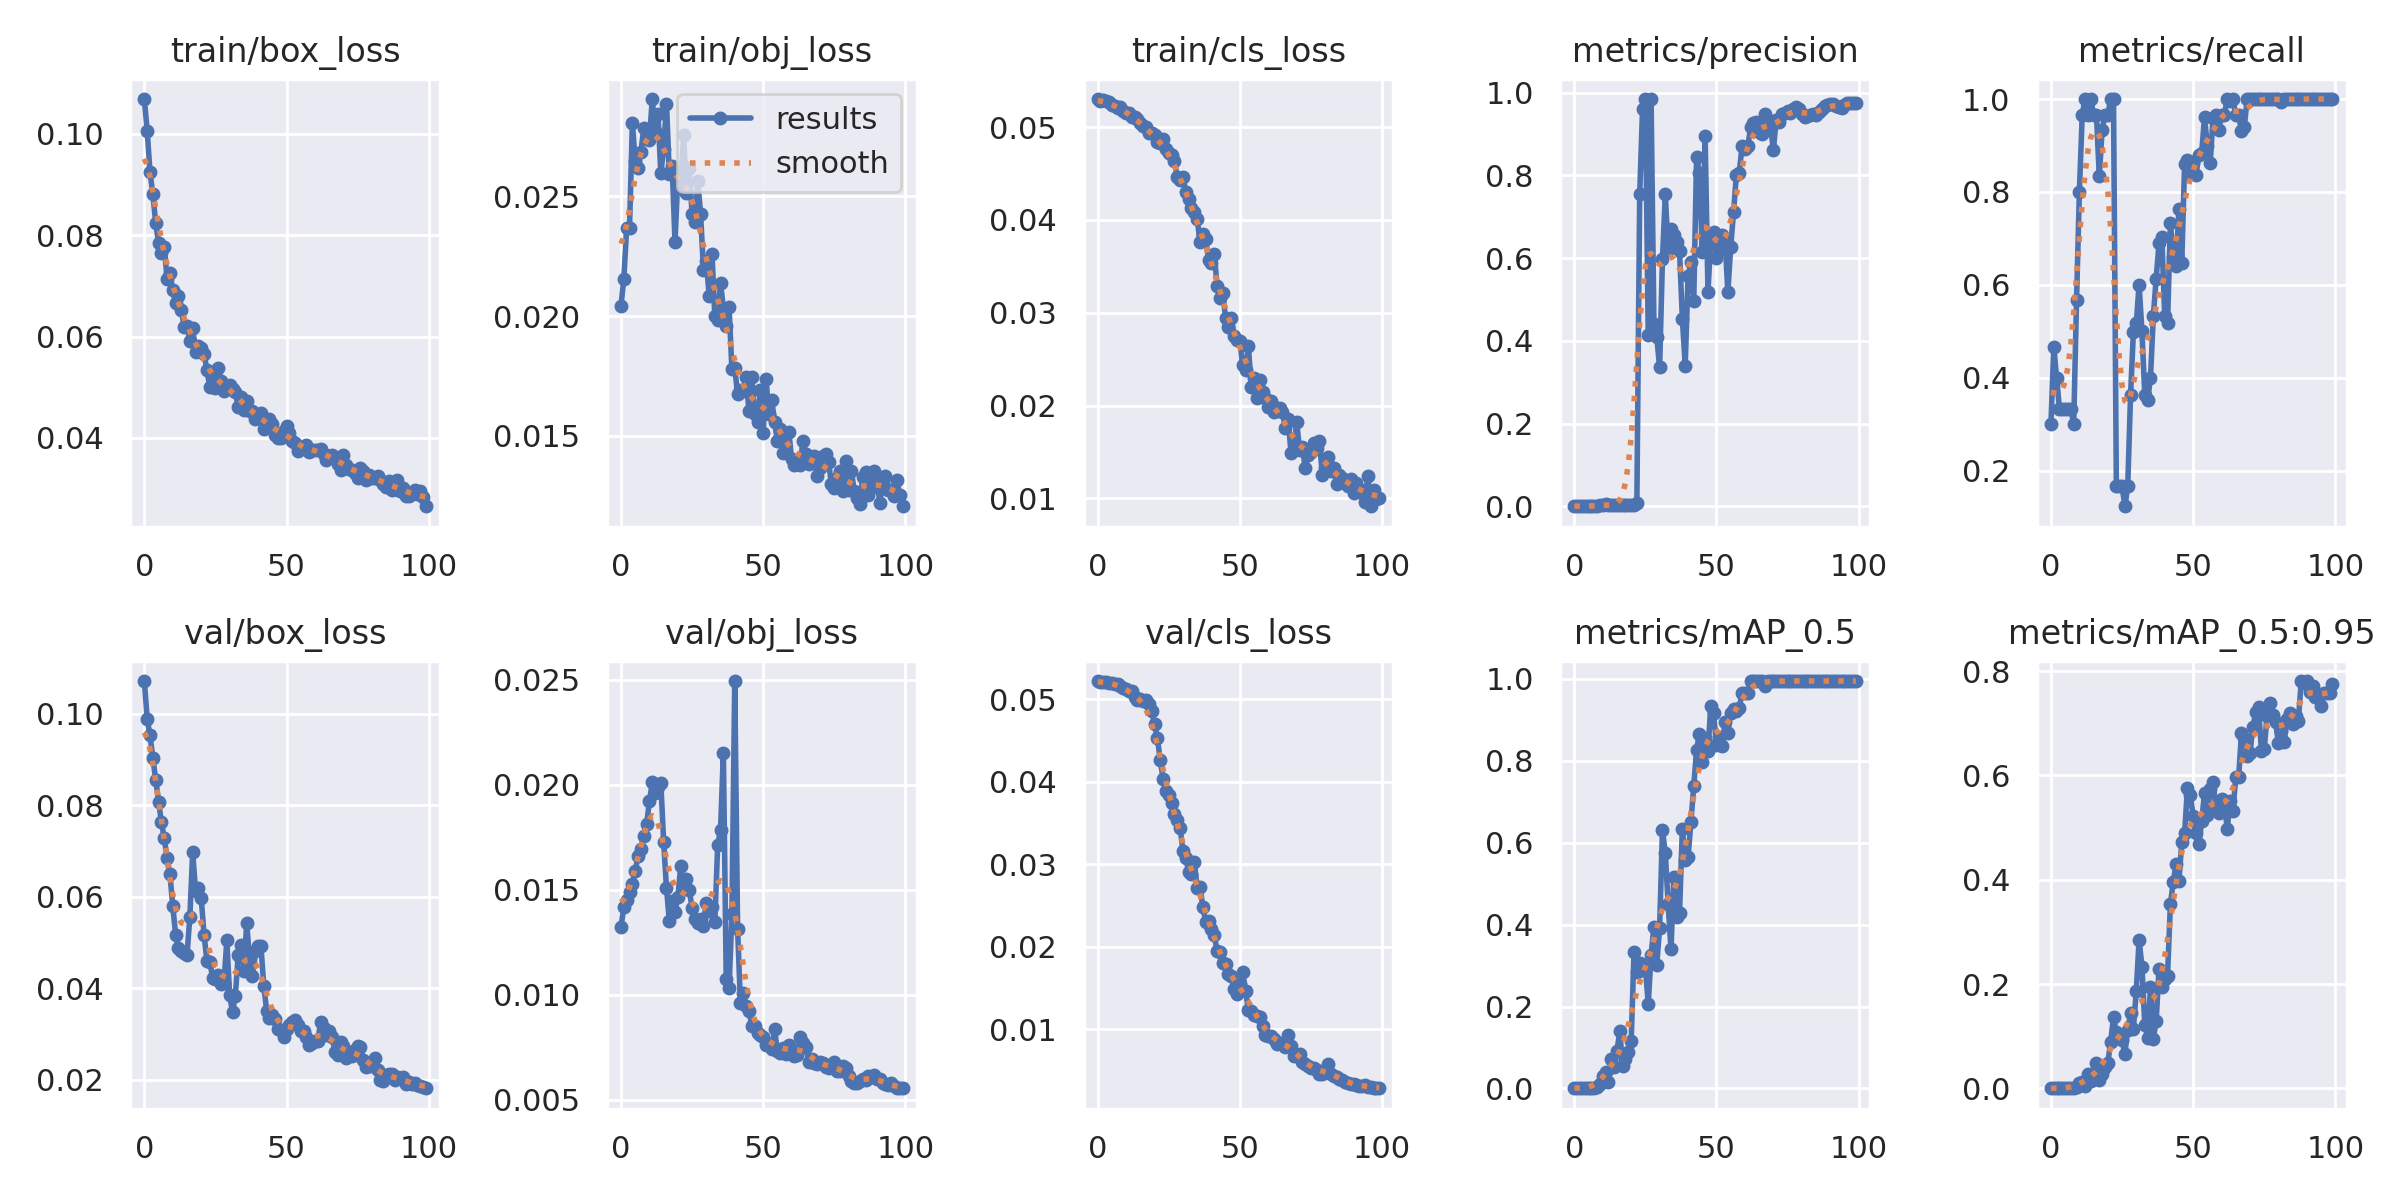

In [79]:
# we can also output some older school graphs if the tensor board isn't working for whatever reason...
from IPython.display import Image
from utils.plots import plot_results  # plot results.txt as results.png
metrics_chart_path = "/home/ranjit/Desktop/object_dete_yolo/sign-language-detection-YOLOV5/yolov5/runs/train/training_result22/results.png"
Image(filename=metrics_chart_path, width=1000)  # view results.png

GROUND TRUTH TRAINING DATA:


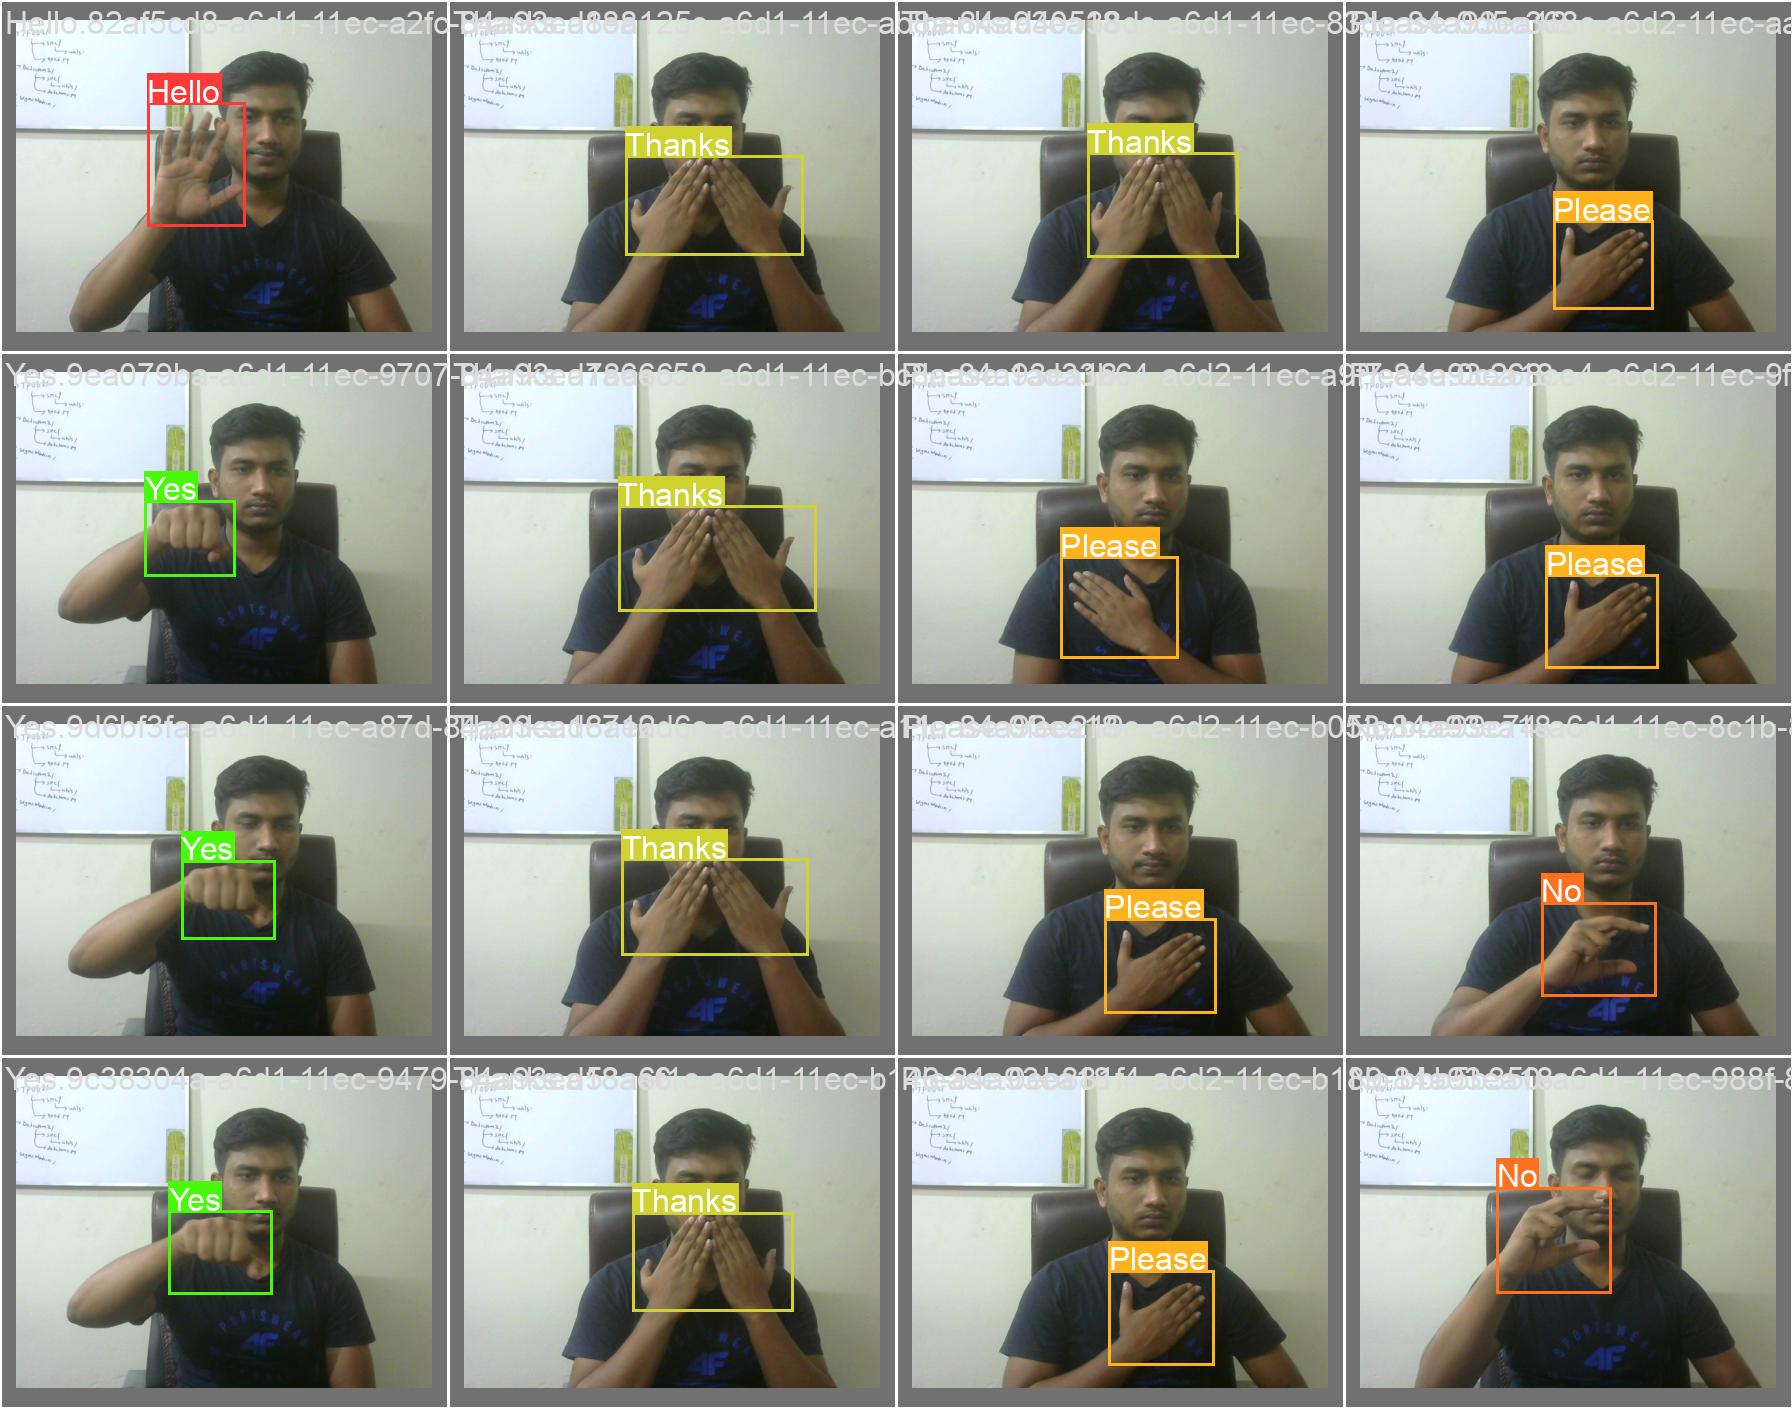

In [82]:
# first, display our ground truth data
print("GROUND TRUTH TRAINING DATA:")
Image(filename='runs/train/training_result22/val_batch0_labels.jpg', width=900)

GROUND TRUTH TRAINING DATA:


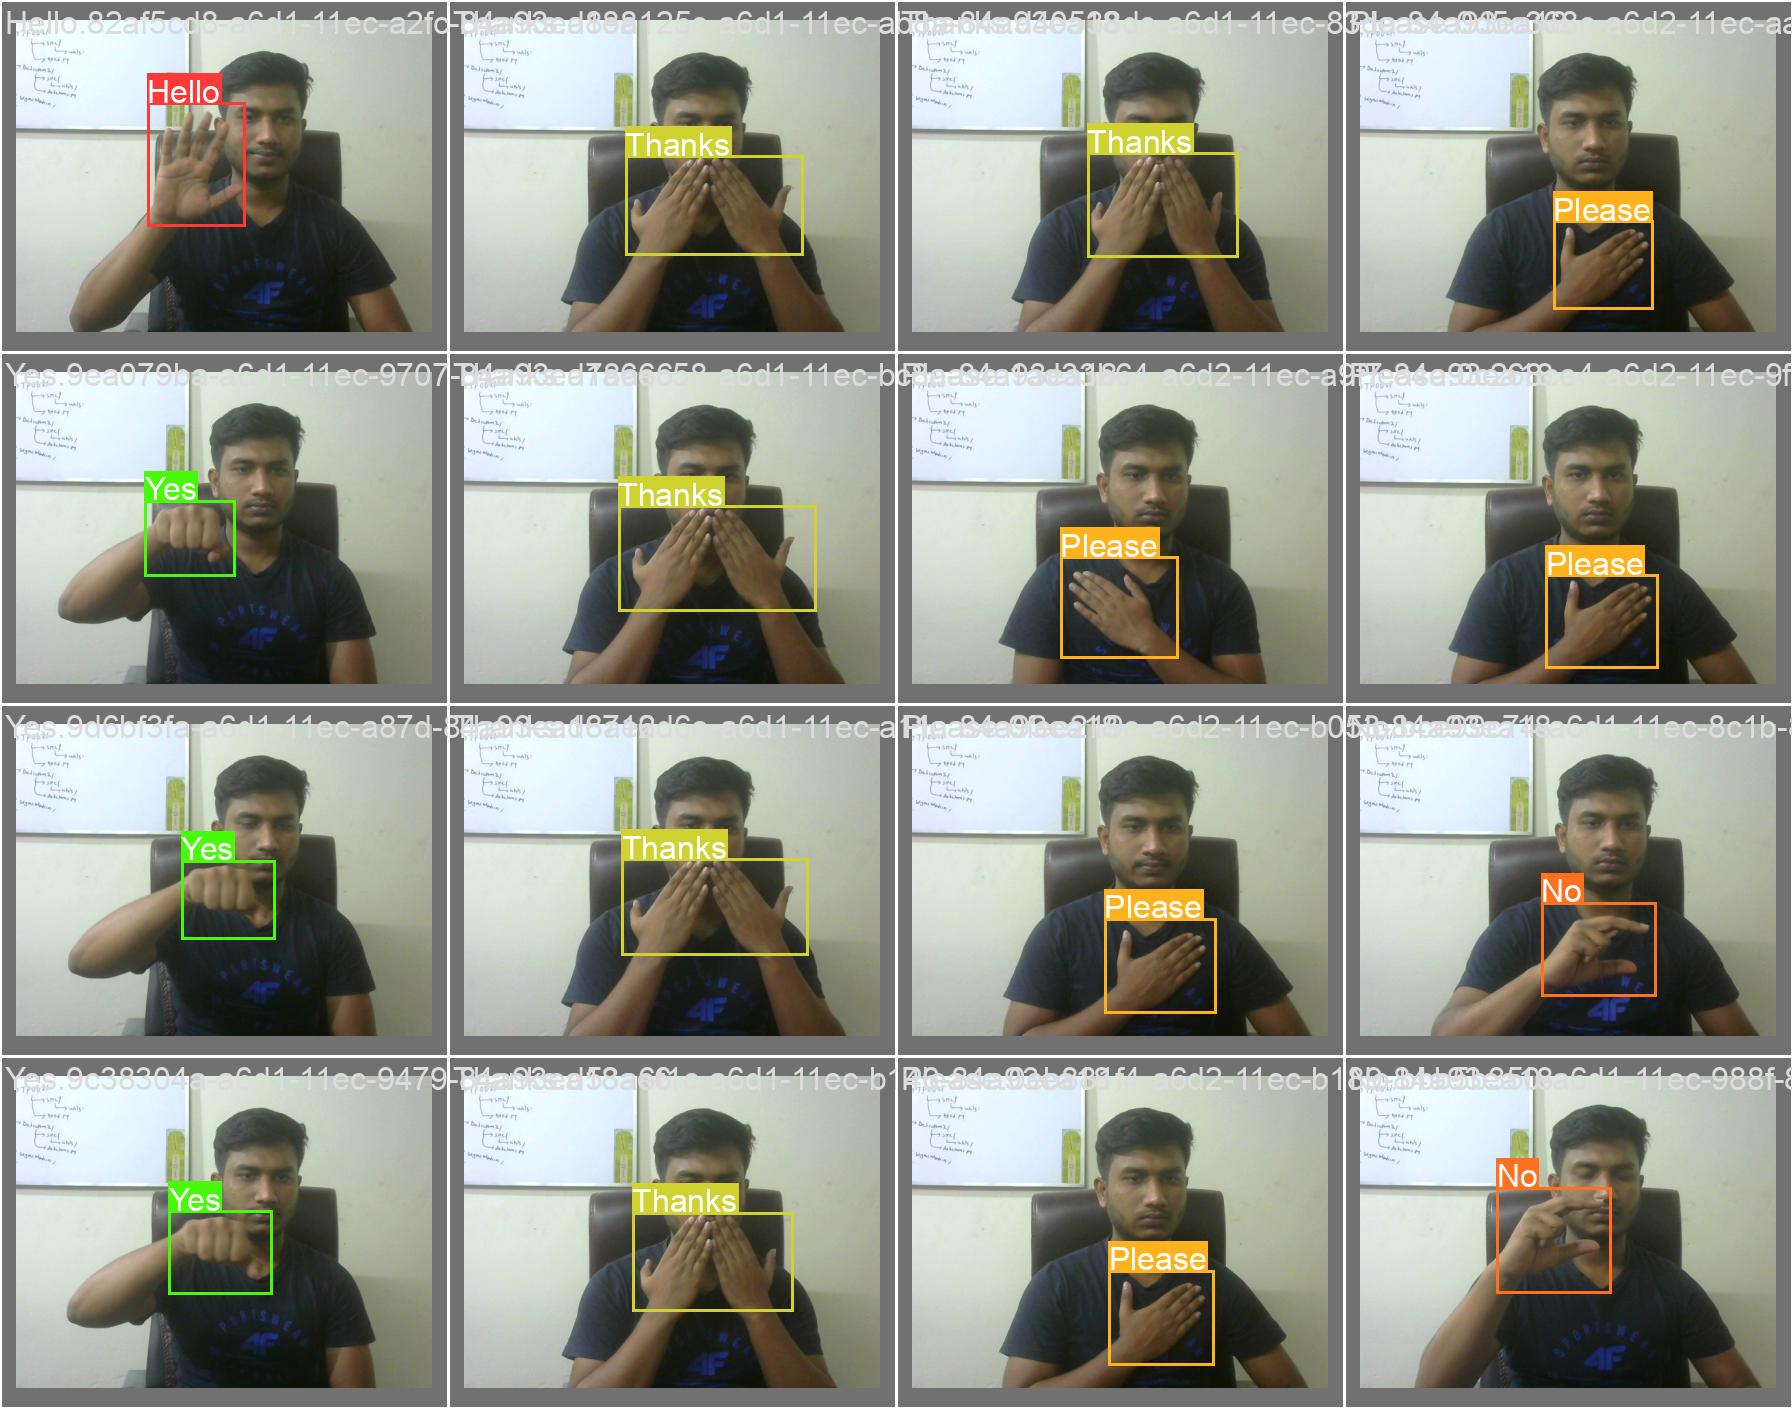

In [84]:
# first, display our ground truth data
print("GROUND TRUTH TRAINING DATA:")
Image(filename='runs/train/training_result22/val_batch0_labels.jpg', width=900)

Prediction on Ground Truth:


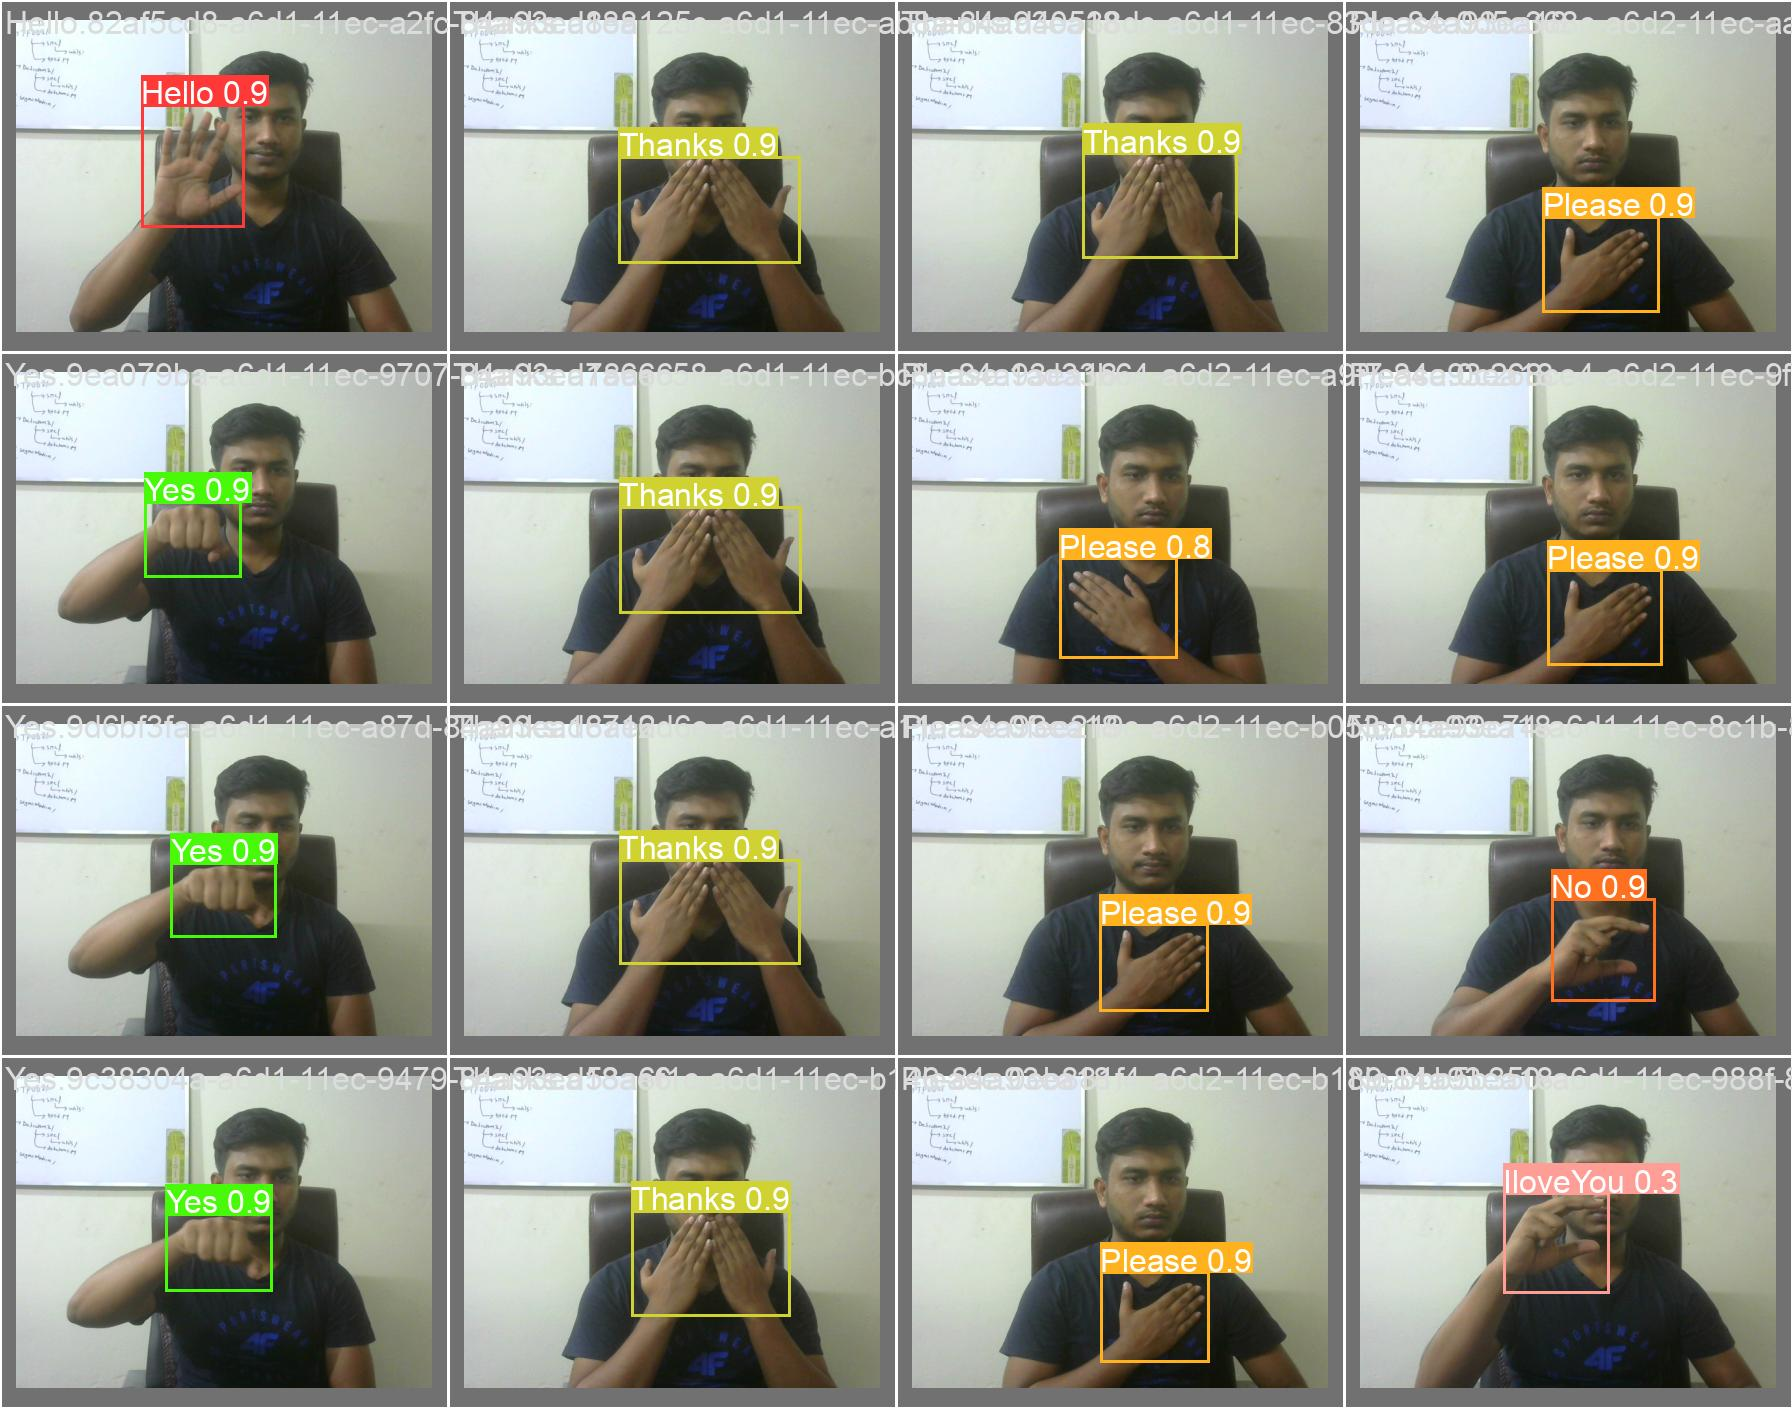

In [85]:
## Prediction on Ground Truth Data
print("Prediction on Ground Truth:")
Image(filename='runs/train/training_result22/val_batch0_pred.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


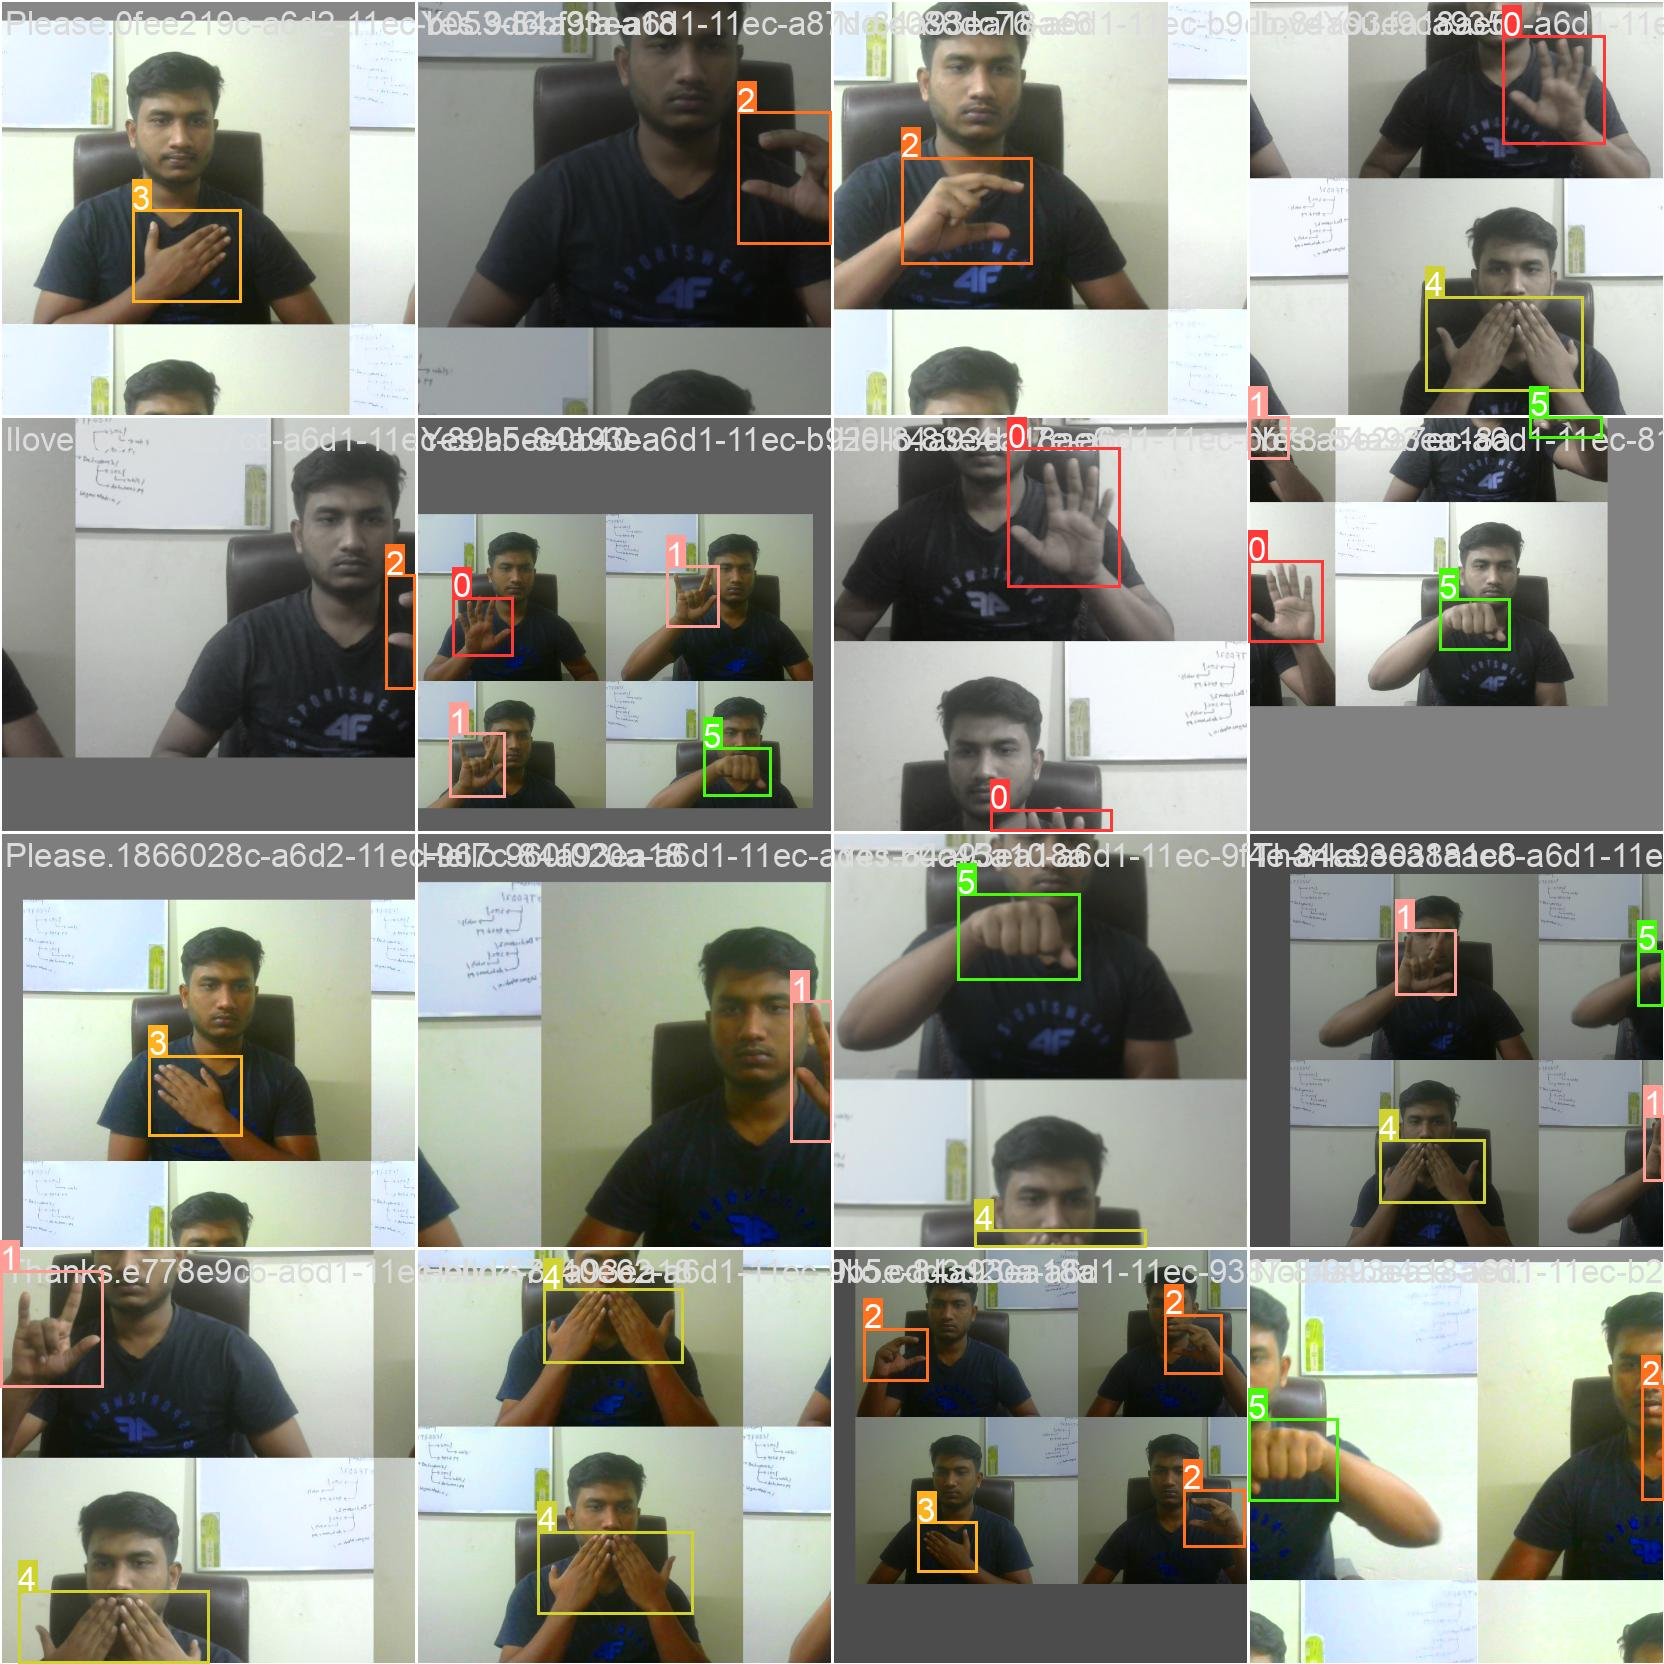

In [23]:

# print out an augmented training example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/drive/MyDrive/object_dete_yolo/sign-language-detection-YOLOV5/yolov5/runs/train/training_result22/train_batch0.jpg', width=900)

In [27]:
# trained weights are saved by default in our weights folder
# best.pt is your latest updated trained yolov5 model, it has previous and updated weights
%ls /content/drive/MyDrive/object_dete_yolo/sign-language-detection-YOLOV5/yolov5/runs/train/training_result22/weights

best.pt  last.pt


### Testing model perfomance on new dataset

In [86]:
## after training, we are testing using detect.py file
## so choosed your best.pt from run

%cd /content/drive/MyDrive/object_dete_yolo/sign-language-detection-YOLOV5/yolov5/

# yolo has already defined train, detect file, you just need to execute with some parameters
!python detect.py --weights runs/train/training_result22/weights/best.pt --img 416 --conf 0.1 --source ../test/images

# After executing this file you will get a new directory inside the yolov5/run/   detect
# in which you will get your output images with detected

In [90]:
path_of_validated_images = "runs/detect/exp" 
# This is the path where you will get your output, after executing detect.py file

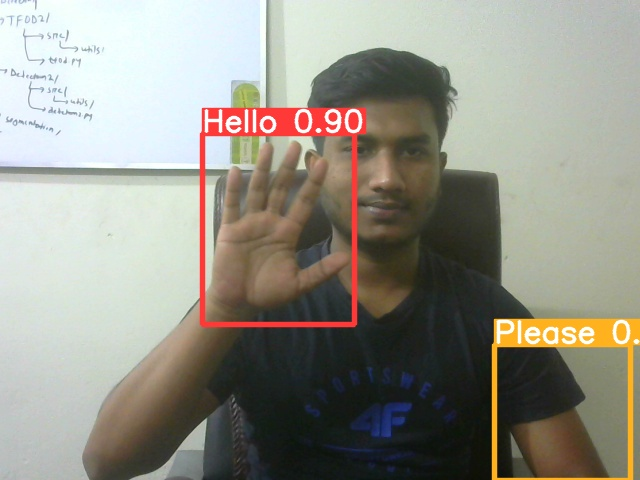

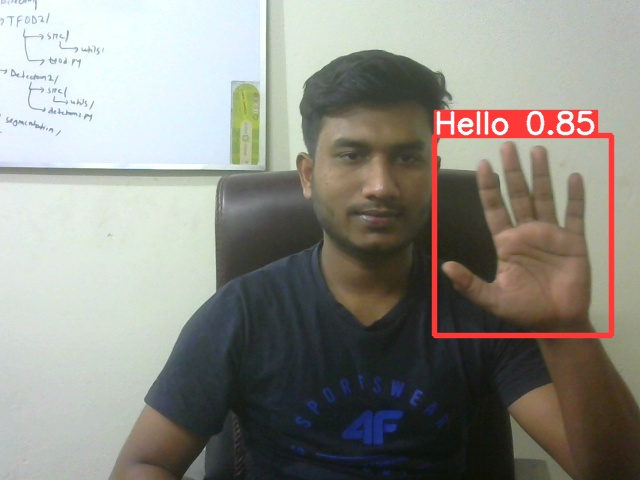

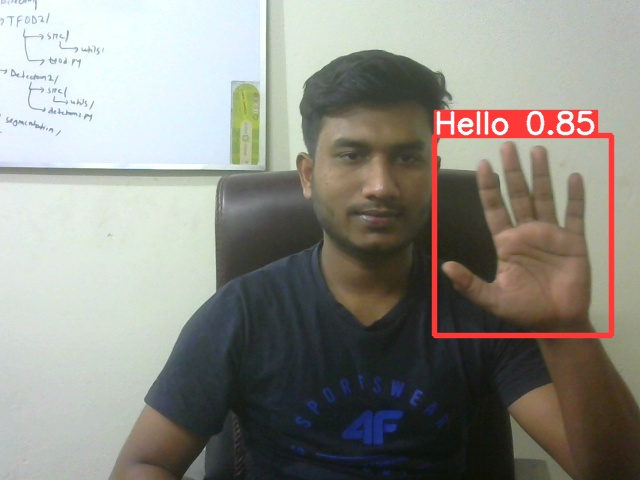

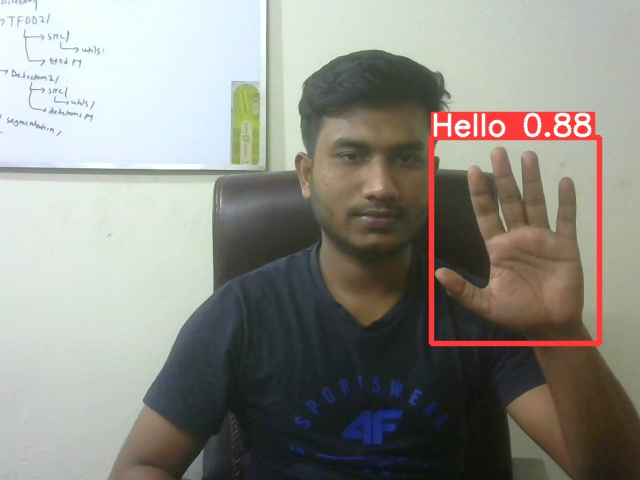

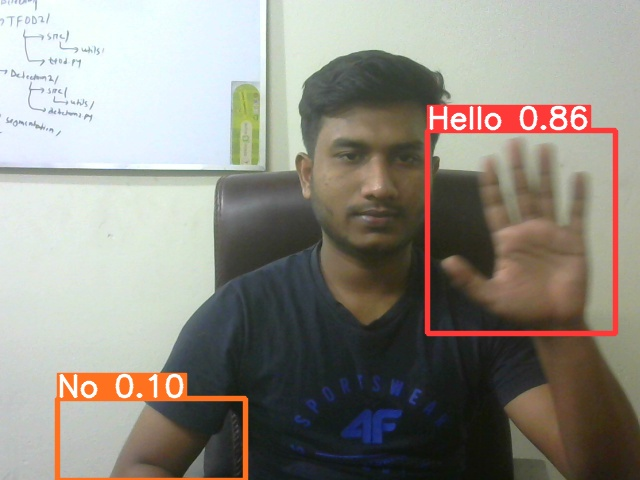

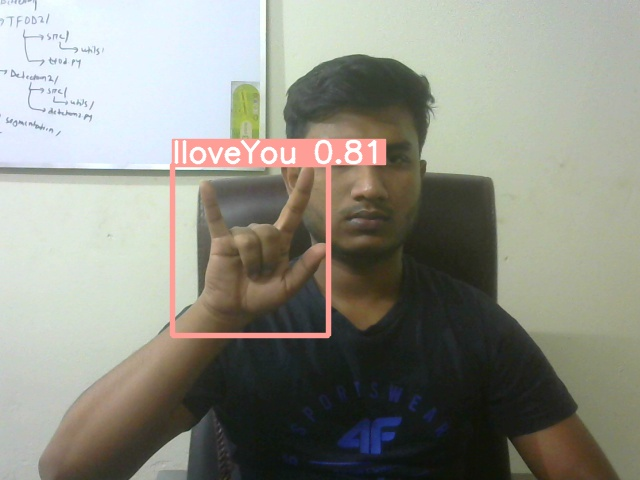

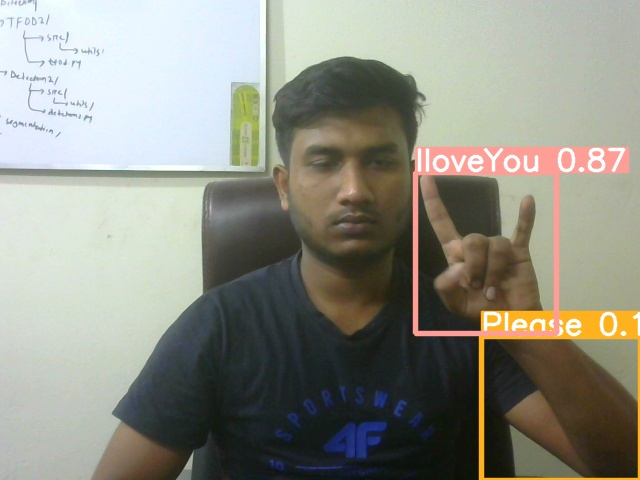

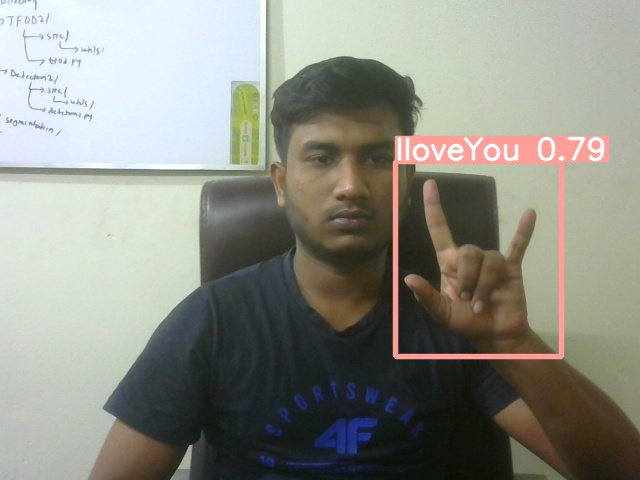

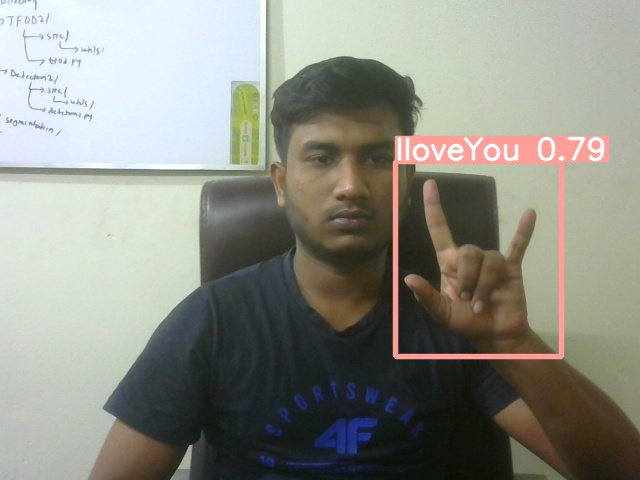

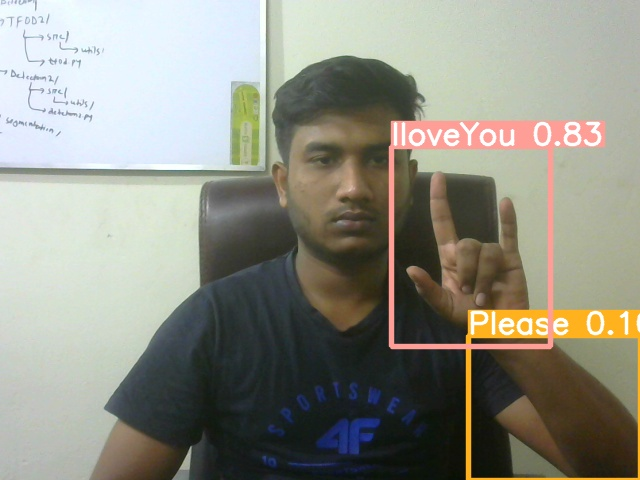

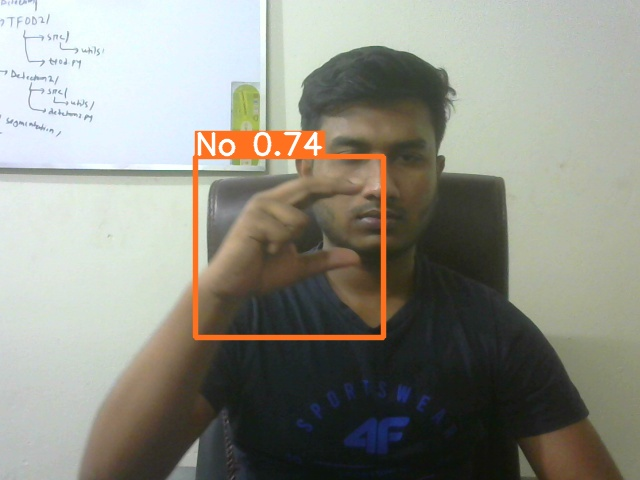

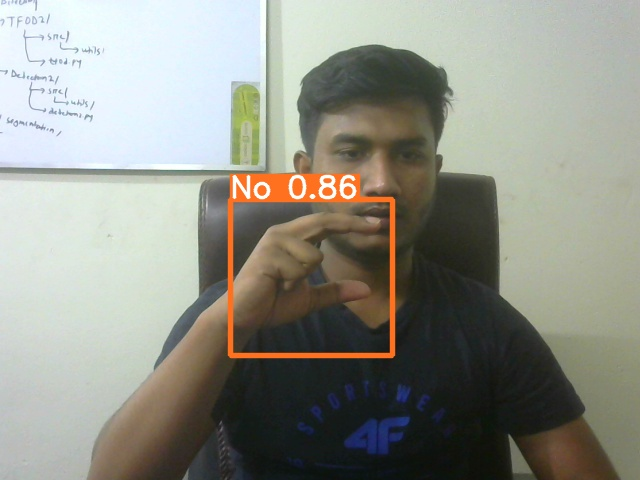

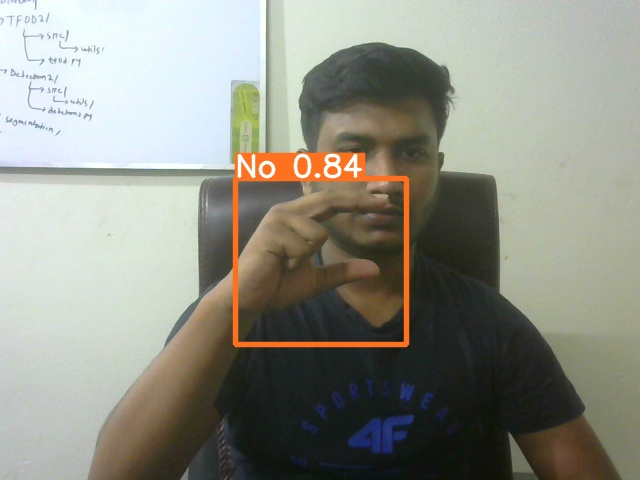

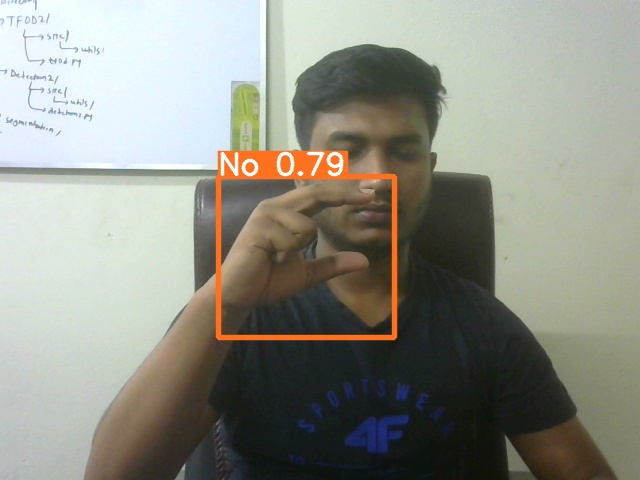

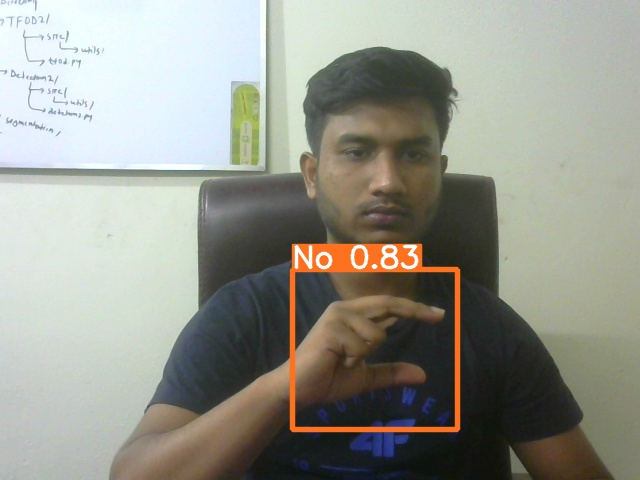

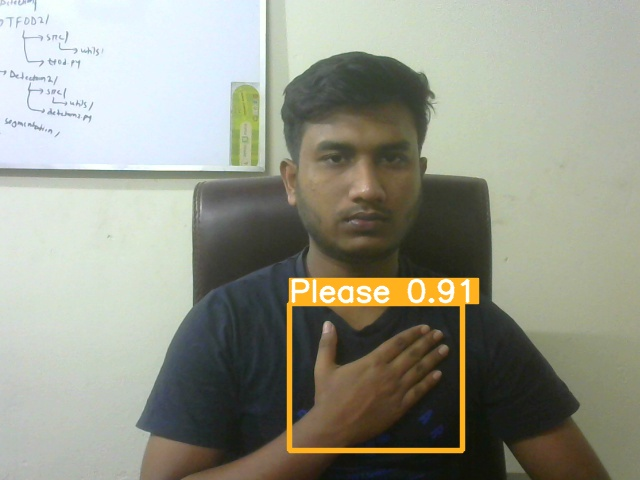

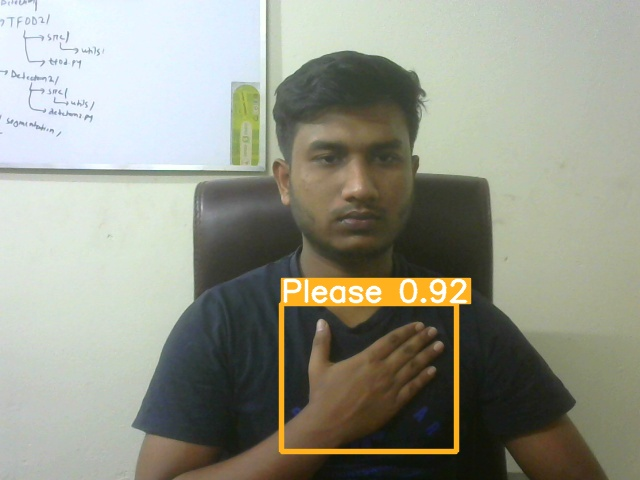

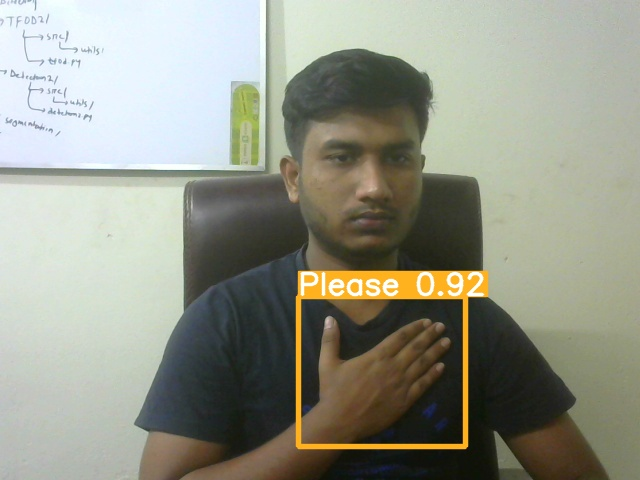

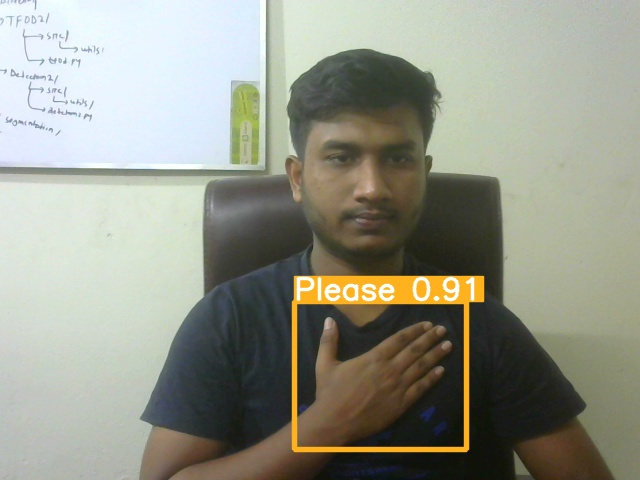

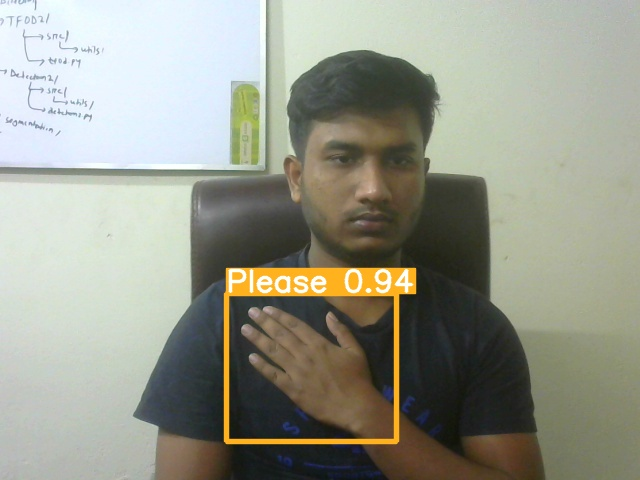

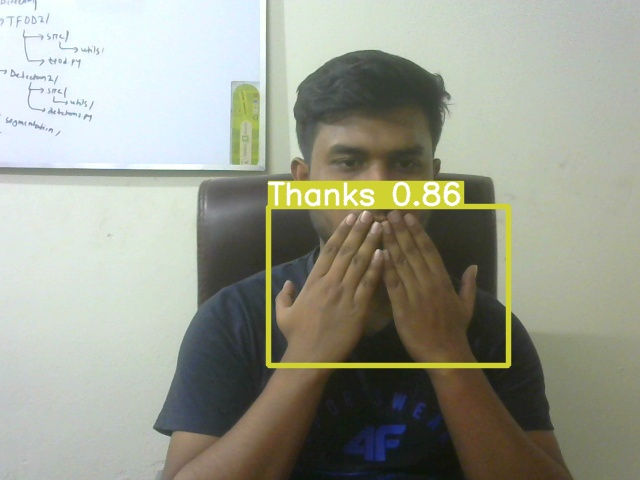

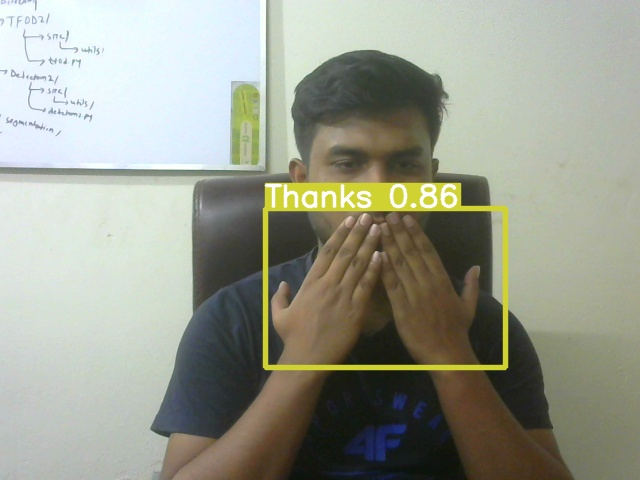

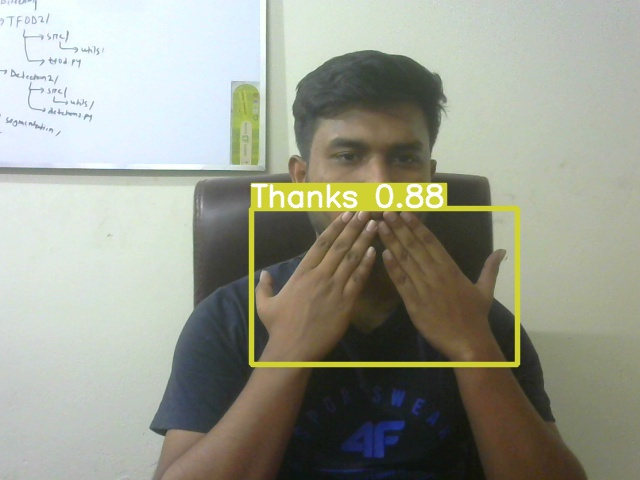

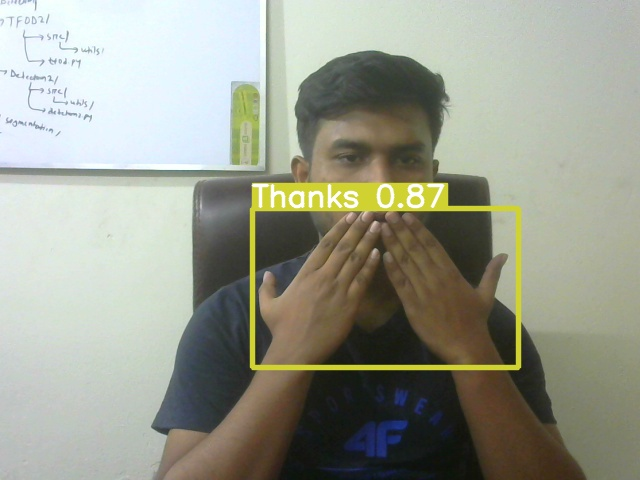

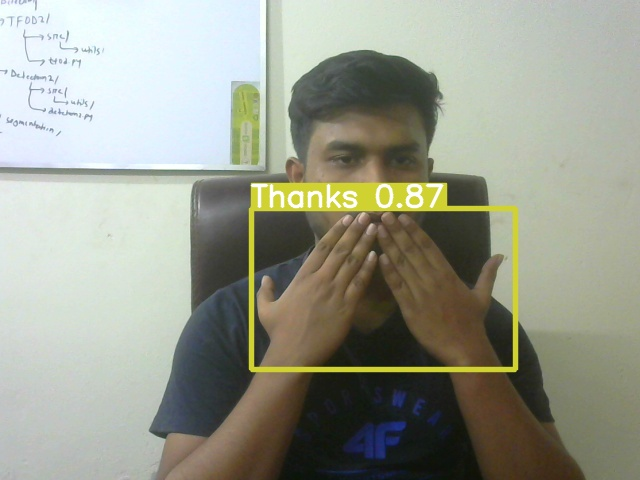

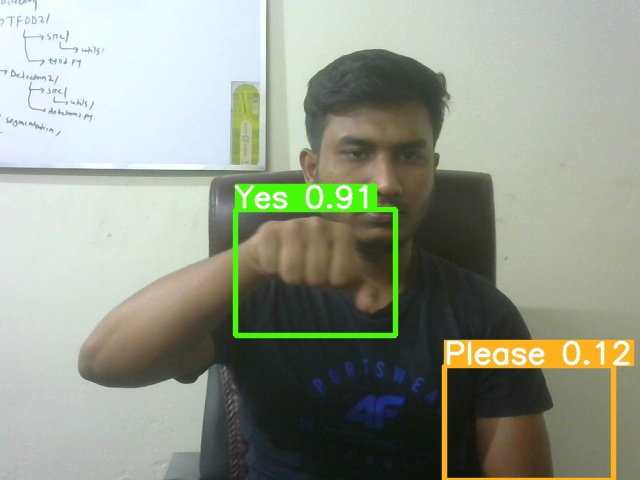

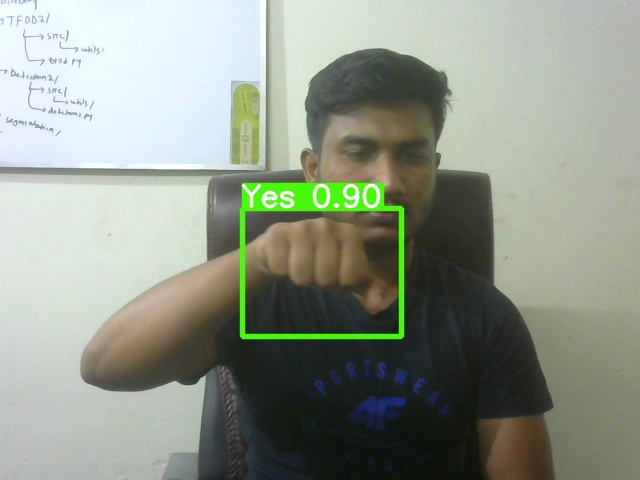

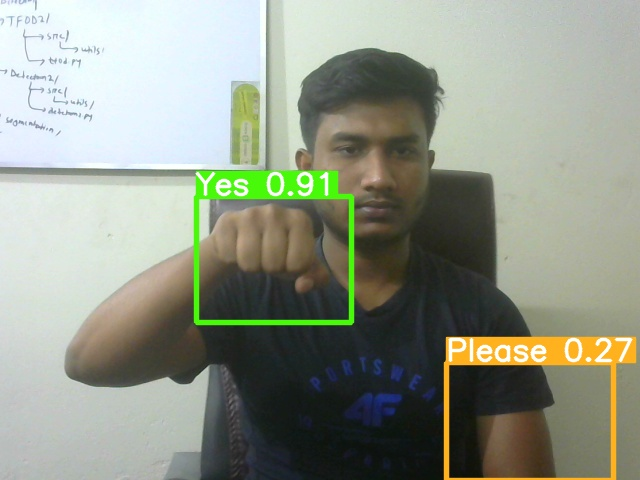

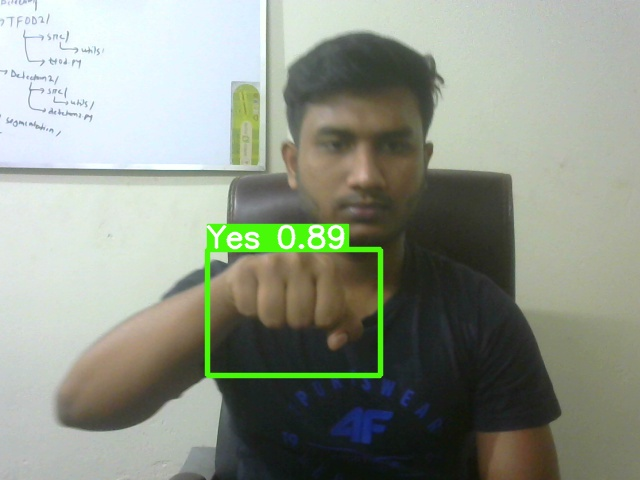

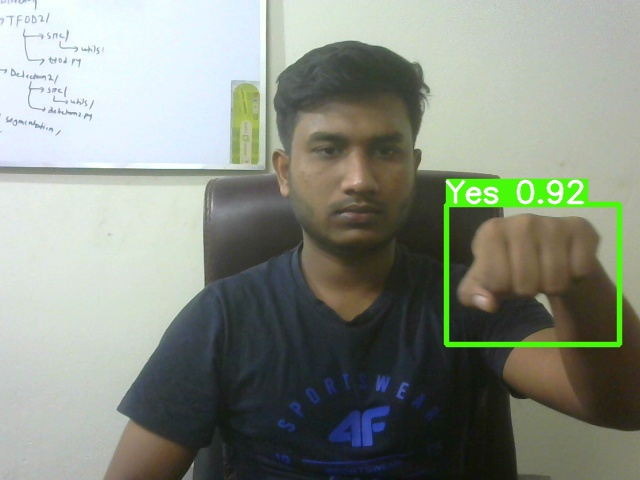

In [34]:
# Now we are going to displaying all are detected images, which we have passed during the detection
import glob
from IPython.display import Image, display

for imageName in glob.glob(path_of_validated_images+'/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

Thank you